# The Oxford Catalogue of Opioids  

#### This notebook visualises the extracted data for the searches and pharmacology data of opioid drugs, more details about this research is available on our OSF project page [here](https://osf.io/2ph6c/). 

In [2]:
# import libraries required for analysis 
import numpy as np
import pandas as pd
from pylab import savefig
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Phase 1: The list of opioid drugs and their nomenclature 

In [3]:
# importing data for phase 1 - the list of opioid drugs 
df1 = pd.read_csv("phase1_oxcatop.csv",thousands=',')

In [4]:
df1.head()

,index_drug_name,ATC,ATC_code,ATC_cat,BNF,BNF_code,BNF_cat,guide_to_pharmacol,INCB,Merck_index,Martindale,INN,INN_name,BAN,USAN,who_stem,IUPAC_name
0,3-methylfentanyl,0,NaN,NaN,0,NaN,NaN,0,1,0,0,0,NaN,NaN,NaN,-fentanil,N-[3-methyl-1-(2-phenylethyl)piperidin-4-yl]-N...
1,3-methylthiofentanyl,0,NaN,NaN,0,NaN,NaN,0,1,0,0,0,NaN,NaN,NaN,-fentanil,N-[3-methyl-1-(2-thiophen-2-ylethyl)piperidin-...
2,4-chloroisobutyrfentanyl,0,NaN,NaN,0,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,-fentanil,2-Methyl-N-(4-chlorophenyl)-N-[1-(1-phenylprop...
3,4-fluoroisobutyrfentanyl,0,NaN,NaN,0,NaN,NaN,0,1,0,0,0,NaN,NaN,NaN,-fentanil,N-(4-Fluorophenyl)-N-[1-(2-phenylethyl)-4-pipe...
4,4-phenylfentanyl,0,NaN,NaN,0,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,-fentanil,N-Phenyl-N-[4-phenyl-1-(2-phenylethyl)piperidi...


In [5]:
df1.sum()

index_drug_name       3-methylfentanyl3-methylthiofentanyl4-chlorois...
ATC                                                                  57
BNF                                                                  31
guide_to_pharmacol                                                   65
INCB                                                                120
Merck_index                                                         110
Martindale                                                           68
INN                                                                 170
IUPAC_name            N-[3-methyl-1-(2-phenylethyl)piperidin-4-yl]-N...
dtype: object

In [6]:
# total number of opioids from searches
57+31+65+120+110+68+170

621

In [21]:
# removing duplicates 
621-432

189

In [22]:
# new drugs found from the literature & wikipedia 
189+42+2

233

In [9]:
# percentage of drugs in each drug source
(df1['INN'].value_counts()/df1['INN'].count())*100

1    72.961373
0    27.038627
Name: INN, dtype: float64

In [10]:
(df1['INCB'].value_counts()/df1['INCB'].count())*100

1    51.502146
0    48.497854
Name: INCB, dtype: float64

In [11]:
(df1['Merck_index'].value_counts()/df1['Merck_index'].count())*100

0    52.7897
1    47.2103
Name: Merck_index, dtype: float64

In [13]:
(df1['Martindale'].value_counts()/df1['Martindale'].count())*100

0    70.815451
1    29.184549
Name: Martindale, dtype: float64

In [14]:
(df1['guide_to_pharmacol'].value_counts()/df1['guide_to_pharmacol'].count())*100

0    72.103004
1    27.896996
Name: guide_to_pharmacol, dtype: float64

In [15]:
(df1['ATC'].value_counts()/df1['ATC'].count())*100

0    75.536481
1    24.463519
Name: ATC, dtype: float64

In [16]:
(df1['BNF'].value_counts()/df1['BNF'].count())*100

0    86.695279
1    13.304721
Name: BNF, dtype: float64

In [17]:
# creating a new variable to sum the 7 data sources 
df1['sources'] = df1['ATC'] + df1['BNF'] + df1['guide_to_pharmacol'] + df1['INCB'] + df1['Merck_index'] + df1['Martindale'] + df1['INN']

In [18]:
df1.describe()

,ATC,BNF,guide_to_pharmacol,INCB,Merck_index,Martindale,INN,sources
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,0.244635,0.133047,0.278970,0.515021,0.472103,0.291845,0.729614,2.665236
std,0.430796,0.340357,0.449458,0.500850,0.500296,0.455590,0.445116,1.969474
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


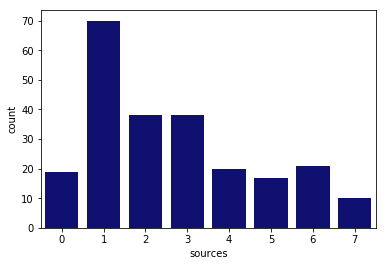

In [23]:
# visualising the spread of data to check the median is the best measure
ax = sns.countplot(data=df1, x="sources", color="navy")

In [24]:
# importing new dataframe for figure of seven data sources 
df2 = pd.read_csv("oxcat_databases.csv",thousands=',')
df2.head()

,databases,opioids
0,INN,170
1,INCB,120
2,Merck,110
3,Martindale,68
4,Guide to Pharmacology,65


In [25]:
df2.describe()

,opioids
count,7.000000
mean,88.714286
std,47.200686
min,31.000000
25%,61.000000
50%,68.000000
75%,115.000000
max,170.000000


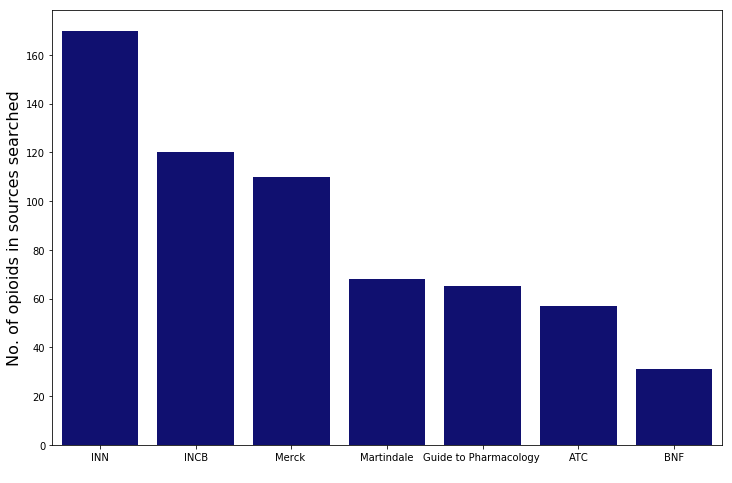

In [28]:
# ploting data as a bar graph using seaborn
plt.figure(figsize=(12,8))
ax = sns.barplot(data=df2, x="databases", y="opioids", color="navy")
plt.xlabel(' ')
plt.ylabel('No. of opioids in sources searched', fontsize=16)

plt.savefig("databases.png", dpi=600)

In [29]:
# determining the number of unique stems
df1['who_stem'].nunique()

10

In [30]:
# the breakdown of the number of drugs in each stems subgroup 
df1['who_stem'].value_counts()

-fentanil    48
-orphine     33
-adol        25
-eridine     21
-azocine     19
-orphan      14
nal-         12
-orphone      7
-ethidine     3
-orphinol     1
Name: who_stem, dtype: int64

In [31]:
# the percentage of drugs in each stem subgroup 
(df1['who_stem'].value_counts()/df1['who_stem'].count())*100

-fentanil    26.229508
-orphine     18.032787
-adol        13.661202
-eridine     11.475410
-azocine     10.382514
-orphan       7.650273
nal-          6.557377
-orphone      3.825137
-ethidine     1.639344
-orphinol     0.546448
Name: who_stem, dtype: float64

In [32]:
# number of drugs with no stem 
len(df1) - df1['who_stem'].count()

50

In [33]:
(50/233)*100

21.45922746781116

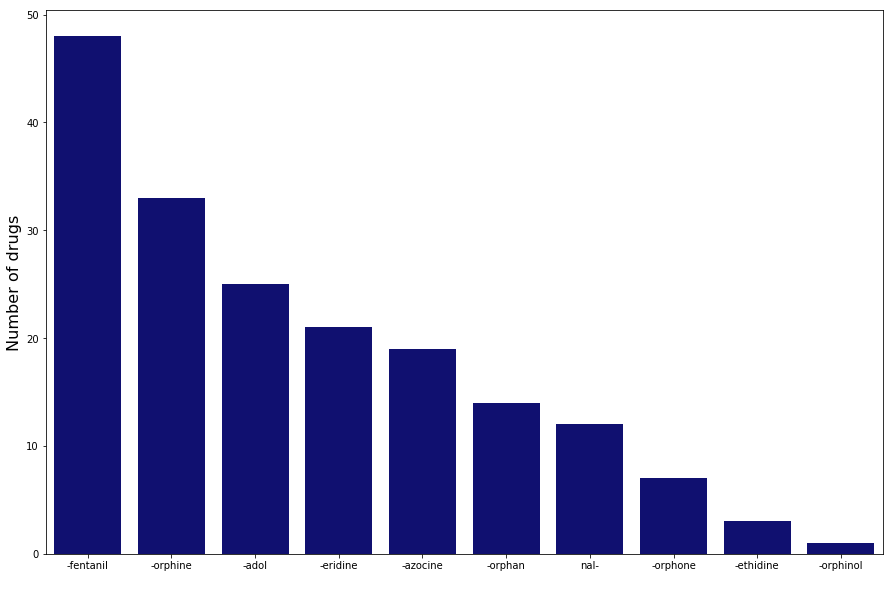

In [35]:
# plotting the number of stems using seaborn
plt.figure(figsize=(15,10))
ax = sns.countplot(data=df1, 
                   x="who_stem", 
                   color="navy",
                   order=df1['who_stem'].value_counts().index)
plt.xlabel(' ')
plt.ylabel('Number of drugs', fontsize=16)

plt.savefig("fig_stem.png", dpi=600)

### Phase 2: Cataloging of opioids by pharmacology properties   

In [36]:
# importing data for phase 2 - pharmacology data 
df3 = pd.read_csv("phase2_oxcatop.csv",thousands=',')

In [37]:
df3.head()

,index_drug_name,molecular_formula,mole_weight_g_mol​,MOP,effect_MOP,DOP,effect_DOP,KOP,effect_KOP,NOP,effect_NOP,class
0,3-methylfentanyl,C23H30N2O,350.50,1.0,agonist,1.0,agonist,1.0,agonist,0.0,NaN,synthetic
1,3-methylthiofentanyl,C21H28N2OS,356.50,1.0,agonist,1.0,agonist,1.0,agonist,0.0,NaN,synthetic
2,4-chloroisobutyrfentanyl,C23H29ClN2O,384.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,synthetic
3,4-fluoroisobutyrfentanyl,C23H29FN2O,368.50,1.0,agonist,NaN,NaN,NaN,NaN,NaN,NaN,synthetic
4,4-phenylfentanyl,\tC28H32N2O,412.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,synthetic


In [38]:
# calculating the median for molecular weight 
df3.describe()

,mole_weight_g_mol​,MOP,DOP,KOP,NOP
count,233.000000,140.000000,84.000000,84.000000,10.000000
mean,355.127554,0.950000,0.714286,0.833333,0.400000
std,91.661892,0.218728,0.454467,0.374916,0.516398
min,221.340000,0.000000,0.000000,0.000000,0.000000
25%,299.400000,1.000000,0.000000,1.000000,0.000000
50%,347.500000,1.000000,1.000000,1.000000,0.000000
75%,392.500000,1.000000,1.000000,1.000000,1.000000
max,960.500000,1.000000,1.000000,1.000000,1.000000


In [42]:
#missing data for receptors 
(10/233)*100

4.291845493562231

In [39]:
# determining the total for each receptor 
df3.sum()

index_drug_name       3-methylfentanyl3-methylthiofentanyl4-chlorois...
molecular_formula     C23H30N2O C21H28N2OSC23H29ClN2OC23H29FN2O\tC28...
mole_weight_g_mol​                                              82744.7
MOP                                                                 133
DOP                                                                  60
KOP                                                                  70
NOP                                                                   4
class                 syntheticsyntheticsyntheticsyntheticsynthetics...
dtype: object

In [43]:
# the breakdown of the number of drugs in each suffix subgroup 
df3['effect_MOP'].value_counts()

agonist            103
antagonist          18
partial agonist      8
mixed                4
Name: effect_MOP, dtype: int64

In [44]:
df3['effect_DOP'].value_counts()

agonist            40
antagonist         16
partial agonist     3
mixed               1
Name: effect_DOP, dtype: int64

In [45]:
df3['effect_KOP'].value_counts()

agonist            45
antagonist         15
partial agonist     8
unknown             1
mixed               1
Name: effect_KOP, dtype: int64

In [46]:
df3['effect_NOP'].value_counts()

agonist            3
partial agonist    1
Name: effect_NOP, dtype: int64

In [47]:
# total agonists 
103 + 40 + 45 + 3

191

In [48]:
# percentage of agonists 
((191)/233) * 100

81.97424892703863

In [49]:
# total partial agonists 
8+3+8+1

20

In [50]:
# percentage of partial agonists 
(20/233)*100

8.583690987124463

In [51]:
# total antagonists
18+16+15

49

In [52]:
# percentage of antagonits 
(49/233)*100

21.030042918454935

In [53]:
# percentage of mixed receptors 
(6/233)*100

2.575107296137339

In [54]:
# opioid classes based on their origin of discovery or development
df3['class'].value_counts()

synthetic         190
semi-synthetic     36
alkaloid            7
Name: class, dtype: int64

In [55]:
(df3['class'].value_counts()/df3['class'].count())*100

synthetic         81.545064
semi-synthetic    15.450644
alkaloid           3.004292
Name: class, dtype: float64